In [1]:
import pandas as pd
from pylab import *

In [2]:
#import data
X_train = pd.read_csv('./data/nba/X_train.csv')
y_train = pd.read_csv('./data/nba/y_train.csv')
X_test = pd.read_csv('./data/nba/X_test.csv')

In [3]:
print(X_train.shape)
print(X_train.columns)
print(y_train.columns)
print(X_train[:4])
print(y_train[:4])

(52399, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')
   PERIOD  GAME_CLOCK  SHOT_CLOCK  DRIBBLES  TOUCH_TIME  SHOT_DIST  PTS_TYPE  \
0       2         557        15.5         0         0.7        2.1         2   
1       2         151        20.1         0         0.8        2.7         2   
2       3         448        14.2         0         0.8        5.1         2   
3       1         279        10.6         0         0.6        1.9         2   

   CLOSE_DEF_DIST  
0             0.0  
1             3.4  
2             0.1  
3             2.7  
   FGM
0    1
1    1
2    0
3    1


In [4]:
def pd2np(df):
  return df.as_matrix()

In [5]:
def mse(model, X, y):
  return ((model.predict(X) - y)**2).mean()

In [6]:
X = pd2np(X_train)
y = pd2np(y_train)
X_test = pd2np(X_test)

In [7]:
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(52399, 8)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

這邊先試了RandomForestClassifier

In [9]:
# criterion : impurity function
# n_estimators :  number of decision trees
# random_state : seed used by the random number generator
# n_jobs : number of cores for parallelism
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=500, 
                                random_state=1,
                                n_jobs=-1)

X_train, X_valid, y_train, y_valid = train_test_split(
      X, y.ravel(), test_size=0.3, random_state=0)

forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_valid_pred = forest.predict(X_valid)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_valid, y_valid_pred)))

print('Accuracy (forest train): %.3f' % accuracy_score(y_train, y_train_pred))
print('Accuracy (forest validation): %.3f' % accuracy_score(y_valid, y_valid_pred))

MSE train: 0.00, test: 0.40
Accuracy (forest train): 1.000
Accuracy (forest validation): 0.601


接者試了Ridge Regression中，不同的degree和alpha的組合

In [10]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

for d in range(1, 5):
  poly = PolynomialFeatures(degree=d)
  X_poly = poly.fit_transform(X_std)

  X_train, X_valid, y_train, y_valid = train_test_split(
      X_poly, y, test_size=0.3, random_state=0)
  for a in [0, 1, 10, 100, 1000]:
    rg = Ridge(alpha=a)
    rg.fit(X_train, y_train)

    y_train_pred = rg.predict(X_train)
    y_valid_pred = rg.predict(X_valid)
 
    print('\n[Degree = %d Alpha = %d]' % (d, a))
    print('MSE train: %.4f, valid: %.4f' %
          (mean_squared_error(y_train, y_train_pred.round()),
           mean_squared_error(y_valid, y_valid_pred.round())))
    print('Accuracy (X_train): %.3f' % accuracy_score(y_train, y_train_pred.round()))
    print('Accuracy (X_valid): %.3f' % accuracy_score(y_valid, y_valid_pred.round()))


[Degree = 1 Alpha = 0]
MSE train: 0.3950, valid: 0.3873
Accuracy (X_train): 0.605
Accuracy (X_valid): 0.613

[Degree = 1 Alpha = 1]
MSE train: 0.3950, valid: 0.3873
Accuracy (X_train): 0.605
Accuracy (X_valid): 0.613

[Degree = 1 Alpha = 10]
MSE train: 0.3950, valid: 0.3873
Accuracy (X_train): 0.605
Accuracy (X_valid): 0.613

[Degree = 1 Alpha = 100]
MSE train: 0.3948, valid: 0.3873
Accuracy (X_train): 0.605
Accuracy (X_valid): 0.613

[Degree = 1 Alpha = 1000]
MSE train: 0.3939, valid: 0.3875
Accuracy (X_train): 0.606
Accuracy (X_valid): 0.613

[Degree = 2 Alpha = 0]
MSE train: 0.3834, valid: 0.4498
Accuracy (X_train): 0.617
Accuracy (X_valid): 0.619

[Degree = 2 Alpha = 1]
MSE train: 0.3835, valid: 0.4496
Accuracy (X_train): 0.616
Accuracy (X_valid): 0.620

[Degree = 2 Alpha = 10]
MSE train: 0.3837, valid: 0.4496
Accuracy (X_train): 0.616
Accuracy (X_valid): 0.620

[Degree = 2 Alpha = 100]
MSE train: 0.3837, valid: 0.4378
Accuracy (X_train): 0.616
Accuracy (X_valid): 0.619

[Degree =

從上面的結果，從accuracy高和validation mse偏低的組合中，挑選degree=3和alpha=10這組參數，畫出它的learning curve

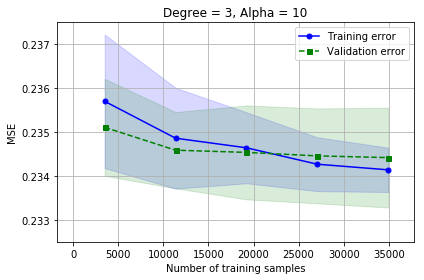

In [11]:
  poly = PolynomialFeatures(degree=3)
  X_poly = poly.fit_transform(X_std)

  X_train, X_valid, y_train, y_valid = train_test_split(
      X_poly, y, test_size=0.3, random_state=0)

  rg = Ridge(alpha=10)
  rg.fit(X_train, y_train)

  y_train_pred = rg.predict(X_train)
  y_valid_pred = rg.predict(X_valid)

  train_sizes, train_scores, valid_scores = learning_curve(
      estimator=rg, X=X, y=y, scoring=mse)

  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  valid_mean = np.mean(valid_scores, axis=1)
  valid_std = np.std(valid_scores, axis=1)

  plt.plot(
      train_sizes,
      train_mean,
      color='blue',
      marker='o',
      markersize=5,
      label='Training error')
  plt.fill_between(
      train_sizes,
      train_mean + train_std,
      train_mean - train_std,
      alpha=0.15,
      color='blue')

  plt.plot(
      train_sizes,
      valid_mean,
      color='green',
      linestyle='--',
      marker='s',
      markersize=5,
      label='Validation error')
  plt.fill_between(
      train_sizes,
      valid_mean + valid_std,
      valid_mean - valid_std,
      alpha=0.15,
      color='green')

  plt.hlines(y=0, xmin=0, xmax=36000, color='red', linewidth=2, linestyle='--')

  plt.title('Degree = 3, Alpha = 10')
  plt.grid()
  plt.xlabel('Number of training samples')
  plt.ylabel('MSE')
  plt.legend(loc='upper right')
  plt.ylim([0.2325, 0.2375])
  plt.tight_layout()
  plt.show()

learning curve的結果，應該是沒有over-fit，否則validation error會很大(可參考前面degree=4的結果)。這是可預期的，畢竟Ridge Regression本身就有regularization的項，這又是經過篩選的參數，所以沒有overfitting也是正常的。

接者我們選擇三個feature，這邊是採用PCA的方式，但找到的三個特徵不是真的原始資料的特徵，只是將資料投影過後的結果

In [12]:
# Z-normalize data
Z = sc.fit_transform(X)
Z_test = sc.fit_transform(X_test)
# Estimate the correlation matrix
R = np.dot(Z.T, Z) / X.shape[0]

#calculate the eigen values, eigen vectors
eigen_vals, eigen_vecs = np.linalg.eigh(R)

# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)

#form the projection matrix
W_3D = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis],
                 eigen_pairs[2][1][:,np.newaxis]))

#cacculate z_pca(2d and 3d)
X_pca3 = Z.dot(W_3D)
X_test_pca3 = Z_test.dot(W_3D)

In [13]:
  X_std = sc.fit_transform(X_pca3)
  X_test_std = sc.fit_transform(X_test_pca3)

  poly = PolynomialFeatures(degree=3)
  X_poly = poly.fit_transform(X_std)
  X_test_poly = poly.fit_transform(X_test_std)

  X_train, X_valid, y_train, y_valid = train_test_split(
      X_poly, y, test_size=0.3, random_state=0)

  rg = Ridge(alpha=10)
  rg.fit(X_train, y_train)

  y_train_pred = rg.predict(X_train)
  y_valid_pred = rg.predict(X_valid)
 
  print('\n[Degree = 3 Alpha = 10]')
  print('MSE train: %.4f, valid: %.4f' %
        (mean_squared_error(y_train, y_train_pred.round()),
         mean_squared_error(y_valid, y_valid_pred.round())))
  print('Accuracy (X_train): %.3f' % accuracy_score(y_train, y_train_pred.round()))
  print('Accuracy (X_valid): %.3f' % accuracy_score(y_valid, y_valid_pred.round()))


[Degree = 3 Alpha = 10]
MSE train: 0.4059, valid: 1.7443
Accuracy (X_train): 0.594
Accuracy (X_valid): 0.593


In [14]:
y_test_pred = rg.predict(X_test_poly).round()
df = pd.DataFrame(y_test_pred)
df.columns =['FGM_PRED']
df.to_csv("./data/nba/y_pred.csv", index = False)

用了RandomForestClassifier和Ridge Regression兩種，如果data未經處理直接套用兩個model，結果後者得到的accuracy比較高一點，再測試不同的degree和alpha值組合去挑更合適的model，得到degree=3 alpha=10時的validation set的accuracy比較高，且MSE是最小的。因為Ridge Regression本身就有regularization，將learning curve畫出來也就不會overfitting。最後我們用PCA挑出三個features來幫忙我們train model，最後用這個model去做預測，輸出成csv。